# Insertion Sort and Merge Sort (implementation from ChatGPT)

In [53]:
# Python program for implementation of Insertion Sort (source geeksforgeeks.org)
# https://www.geeksforgeeks.org/insertion-sort-algorithm/

# Function to sort array using insertion sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1

        # Move elements of arr[0..i-1], that are
        # greater than key, to one position ahead
        # of their current position
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key


# Python program for implementation of Merge Sort (source geeksforgeeks.org)
# https://www.geeksforgeeks.org/merge-sort/#implementation-of-merge-sort

def merge(arr, left, mid, right):
    n1 = mid - left + 1
    n2 = right - mid

    # Create temp arrays
    L = [0] * n1
    R = [0] * n2

    # Copy data to temp arrays L[] and R[]
    for i in range(n1):
        L[i] = arr[left + i]
    for j in range(n2):
        R[j] = arr[mid + 1 + j]

    i = 0  # Initial index of first subarray
    j = 0  # Initial index of second subarray
    k = left  # Initial index of merged subarray

    # Merge the temp arrays back
    # into arr[left..right]
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    # Copy the remaining elements of L[],
    # if there are any
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    # Copy the remaining elements of R[], 
    # if there are any
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

def merge_sort(arr, left, right):
    if left < right:
        mid = (left + right) // 2

        merge_sort(arr, left, mid)
        merge_sort(arr, mid + 1, right)
        merge(arr, left, mid, right)


# Test Sorts Work

In [54]:
# Test the sorting algorithms with an array
arr = [12, 11, 13, 5, 6]

# Create a copy of the array to avoid in-place sorting issues
arr_copy_for_insertion = arr.copy()
arr_copy_for_merge = arr.copy()

# Test insertion sort
insertion_sort(arr_copy_for_insertion)
print("Insertion Sort Result:", arr_copy_for_insertion)

# Test merge sort
merge_sort(arr_copy_for_merge, 0, len(arr_copy_for_merge) - 1)
print("Merge Sort Result:", arr_copy_for_merge)

Insertion Sort Result: [5, 6, 11, 12, 13]
Merge Sort Result: [5, 6, 11, 12, 13]


# Generate a random list of size n

In [55]:
import random
import numpy as np

# Function to generate a random list of integers between X and Y (Edit below)
def generate_random_list(size):
    return [random.randint(0, 2000) for _ in range(size)]

# Run our sort comparison and plot the times taken

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
[  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
   2   2   2   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3
   4   4   4   4   4   4   4   4   4   4   4   4   5   5   5   5   5   5
   5   5   5   6   6   6   6   6   6   6   6   7   7   7   7   7   7   7
   8   8   8   8   8   8   9   9   9   9   9  10  10  10  10  10  11  11
  11  11  11  12  12  12  12  13  13  13  13  14  14  14  15  15  15  15
  16  16  16  17  17  17  18  18  18  19  19  20  20  20  21  21  22  22
  23  23  23  24  24  25  25  26  26  27  27  28  29  29  30  30  31  32
  32  33  33  34  35  35  36  37  38  38  39  40  41  41  42  43  44  45
  46  47  48  49  49  50  51  52  54  55  56  57  58  59  60  61  63 

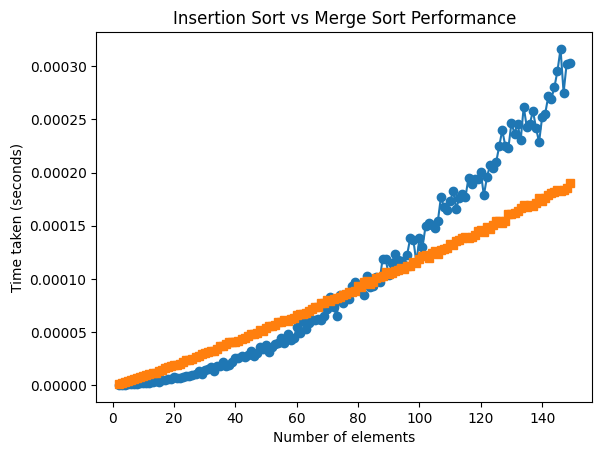

In [56]:
%pip install matplotlib
import timeit
import matplotlib.pyplot as plt

# We will run the function X amount of times (Edit below)
number_of_runs = 1000

# Using exponential increments (Edit below)
sizes = np.geomspace(2, 250, num=250, dtype=int)  # X amount of points between Y and Z, growing geometrically
print(sizes)

sizes = list(range(2, 150))

x_values = []
y_values = []
z_values = []

for size in sizes:
    # Generate a random list of size `size`
    arr = generate_random_list(size)

    # Wrap the functions in a lambda to prevent it from being executed
    # when passed to timeit
    my_function = lambda: insertion_sort(arr.copy())
    my_function2 = lambda: merge_sort(arr.copy(), 0, len(arr) - 1)

    # Calculate the average time taken for both functions
    duration = timeit.timeit(my_function, number=number_of_runs)
    time_per_run = duration / number_of_runs
    duration2 = timeit.timeit(my_function2, number=number_of_runs)
    time_per_run2 = duration2 / number_of_runs

    # Update lists for plotting
    x_values.append(size)
    y_values.append(time_per_run)
    z_values.append(time_per_run2)

# Plot the performance of insertion sort
plt.plot(x_values, y_values, label="Insertion Sort", marker='o')

# Plot the performance of another algorithm for comparison
plt.plot(x_values, z_values, label="Merge Sort", marker='s')

# Add labels and title
plt.xlabel("Number of elements")
plt.ylabel("Time taken (seconds)")
plt.title("Insertion Sort vs Merge Sort Performance")

# Show plot
plt.show()